# https://www.tensorflow.org/tutorials/keras/classification?hl=en

In [30]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


In [31]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

# Có 60.000 hình training, mỗi hình 28x28 pixels.
#    10.000      testing

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [33]:
print(set(train_labels))
train_labels

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

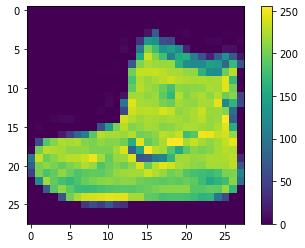

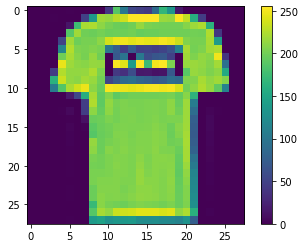

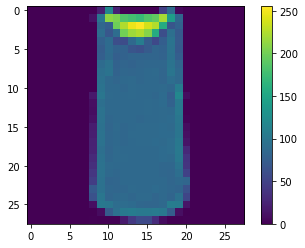

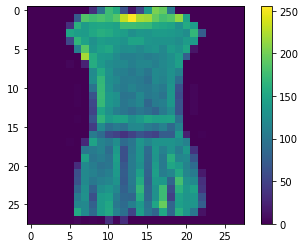

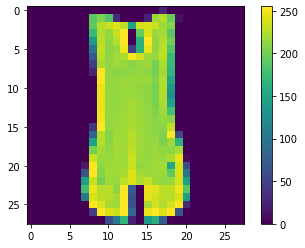

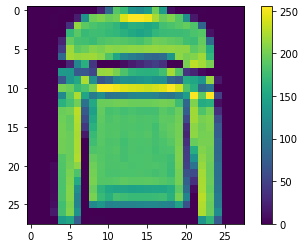

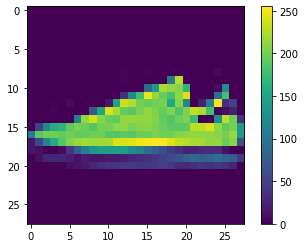

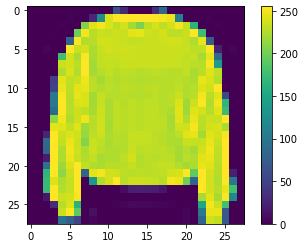

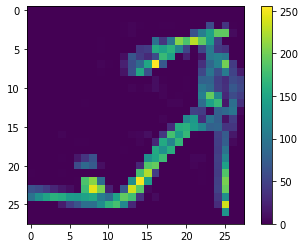

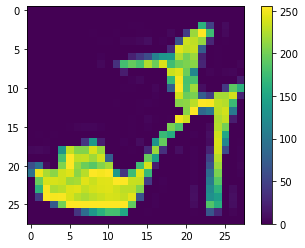

In [34]:
for i in range(10):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
# 

In [35]:
# Dữ liệu ban đầu có khoảng giá trị pixel từ 0-255
# Sau đó, scale lại về khoảng 0-1
train_images = train_images / 255.0

test_images = test_images / 255.0


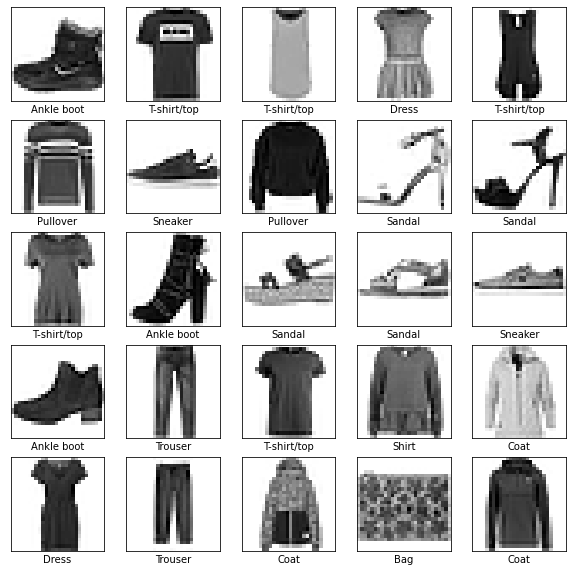

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

In [39]:
# Set up layers
# Tầng đầu tiên, chuyển dữ liệu dạng 2 chiều:28x28 về 1 chiều:784
# Tầng 2 có 128 neurons, hàm activate = relu
model_1hidden = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [36]:
model_3hidden = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10)
])

In [40]:
model_1hidden.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model_3hidden.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
model_1hidden.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5053 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3755 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3374 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3128 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2809 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2690 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2573 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2501 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.242

In [42]:
model_3hidden.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5098 - accuracy: 0.8138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3713 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3353 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3122 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2936 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2781 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2649 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2510 - accuracy: 0.9062
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2407 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.230

In [43]:
test_loss_1hidden, test_acc_1hidden = model_1hidden.evaluate(test_images,  test_labels, verbose=2)
test_loss_3hidden, test_acc_3hidden = model_3hidden.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy 1 hidden:', test_acc_1hidden)
print('\nTest accuracy 3 hiddens:', test_acc_3hidden)

313/313 - 0s - loss: 0.3330 - accuracy: 0.8794
313/313 - 0s - loss: 0.3375 - accuracy: 0.8853

Test accuracy 1 hidden: 0.8794000148773193

Test accuracy 3 hiddens: 0.8852999806404114


In [44]:
probability_model_1hidden = tf.keras.Sequential([model_1hidden, 
                                         tf.keras.layers.Softmax()])

predictions_1hidden = probability_model_1hidden.predict(test_images)

print('prediction 0: ', predictions_1hidden[0])
print('max prediction: ', np.argmax(predictions_1hidden[0]))
print('class name of max prediction: ', class_names[np.argmax(predictions_1hidden[0])])

prediction 0:  [2.3990133e-08 2.0125981e-09 1.0741705e-08 1.2734376e-09 5.7842943e-08
 4.5431641e-04 2.6824459e-08 3.0999094e-02 7.4921317e-08 9.6854633e-01]
max prediction:  9
class name of max prediction:  Ankle boot


In [45]:
probability_model_3hidden = tf.keras.Sequential([model_3hidden, 
                                         tf.keras.layers.Softmax()])

predictions_3hidden = probability_model_3hidden.predict(test_images)

print('prediction 0: ', predictions_3hidden[0])
print('max prediction: ', np.argmax(predictions_3hidden[0]))
print('class name of max prediction: ', class_names[np.argmax(predictions_3hidden[0])])

prediction 0:  [5.2189562e-06 2.2213511e-05 1.0018504e-06 2.7871019e-07 2.8849283e-06
 1.5924699e-05 4.4175786e-07 2.0102391e-03 1.9268031e-08 9.9794179e-01]
max prediction:  9
class name of max prediction:  Ankle boot


In [46]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

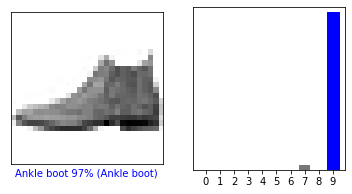

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_1hidden[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_1hidden[i],  test_labels)
plt.show()

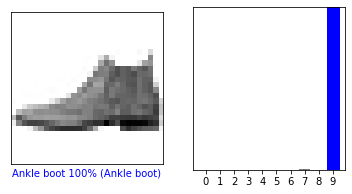

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_3hidden[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_3hidden[i],  test_labels)
plt.show()

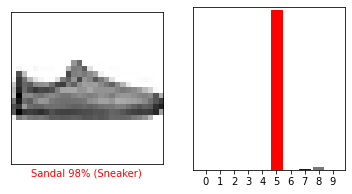

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_1hidden[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_1hidden[i],  test_labels)
plt.show()

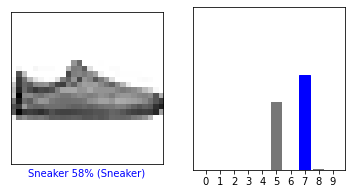

In [50]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_3hidden[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_3hidden[i],  test_labels)
plt.show()

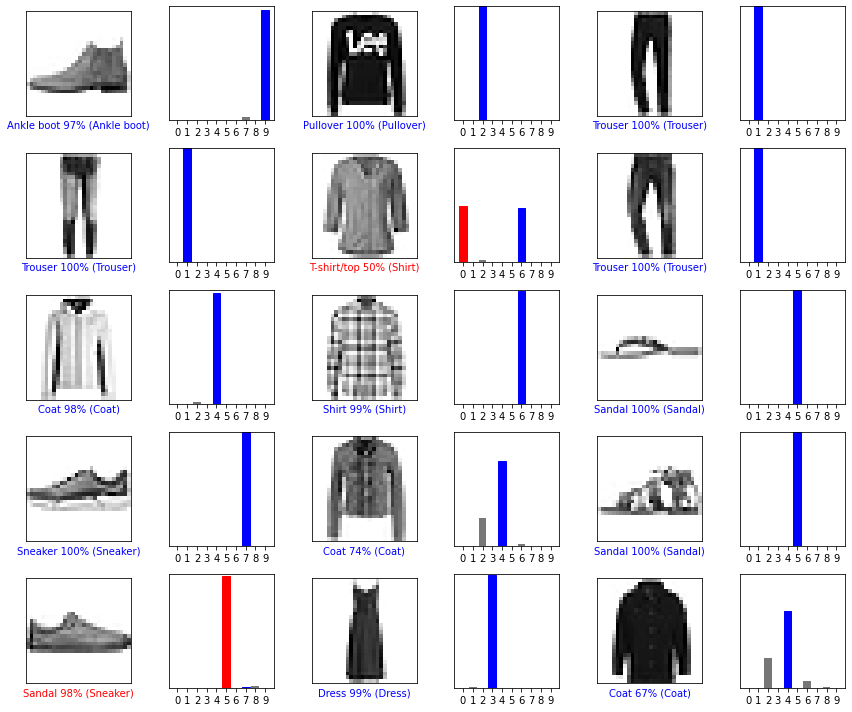

In [51]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_1hidden[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_1hidden[i], test_labels)
plt.tight_layout()
plt.show()

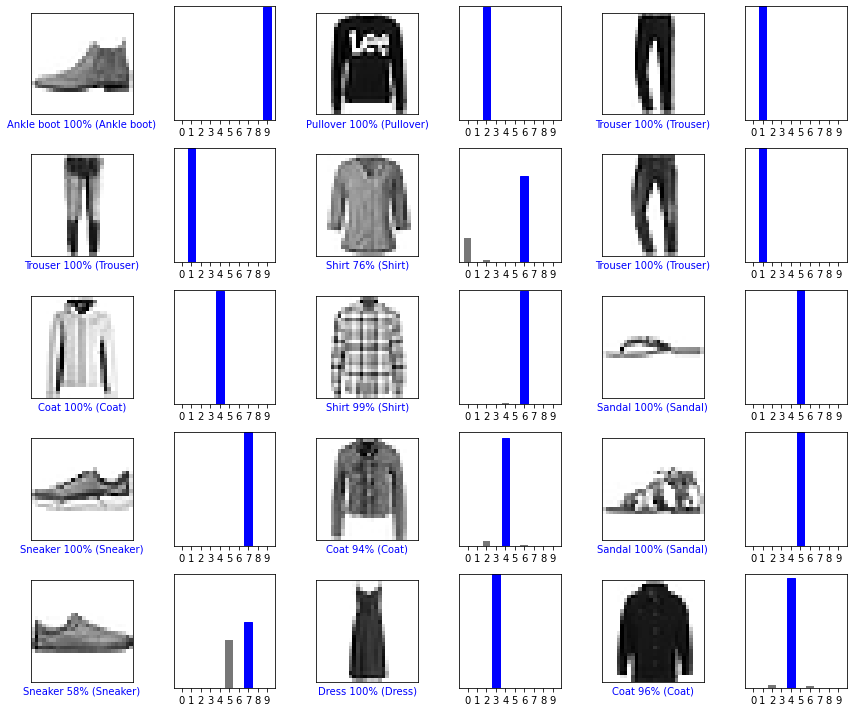

In [52]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_3hidden[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_3hidden[i], test_labels)
plt.tight_layout()
plt.show()